In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [2]:
iris = load_iris()
X = iris.data
y = iris.target


In [3]:
def display_dataset():
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    print(df.head())

display_dataset()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Binarize the labels (one-hot encoding)
lb = LabelBinarizer()
y_binarized = lb.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binarized, test_size=0.2, random_state=42)


In [5]:
model = Sequential([
    Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes in the Iris dataset
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3151 - loss: 0.9516 - val_accuracy: 0.5833 - val_loss: 0.7171
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4873 - loss: 0.8875 - val_accuracy: 0.6667 - val_loss: 0.6913
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5903 - loss: 0.8419 - val_accuracy: 0.7083 - val_loss: 0.6648
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6634 - loss: 0.8180 - val_accuracy: 0.7083 - val_loss: 0.6425
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7036 - loss: 0.7648 - val_accuracy: 0.7083 - val_loss: 0.6211
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6958 - loss: 0.7943 - val_accuracy: 0.7917 - val_loss: 0.6016
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7725 - loss: 0.6736 - val_accuracy: 0.7917 - val_loss: 0.5801
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8306 - loss: 0.6768 - val_accuracy: 0.8333 - val_loss

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.1243
Test Accuracy: 1.0000


In [9]:
# Make predictions
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Display the first 10 predictions
print(f'Predicted classes: {predicted_classes[:10]}')
print(f'True classes: {true_classes[:10]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted classes: [1 0 2 1 1 0 1 2 1 1]
True classes: [1 0 2 1 1 0 1 2 1 1]


In [10]:
from tensorflow.keras.callbacks import EarlyStopping # Import the EarlyStopping class

In [13]:
# Import necessary libraries
# ye hm alag alag kr ke onki accuracy nikale re hain
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Display dataset information
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Classes: {np.unique(y)}")

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization (scaling features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Binarize the labels (one-hot encoding)
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_test_binarized = lb.transform(y_test)

# Function to build and compile the model
def build_compile_model(activation_function):
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),  # Define input shape using Input layer
        Dense(10, activation=activation_function),  # First hidden layer
        Dense(20, activation='sigmoid'),  # Second hidden layer with Sigmoid
        Dense(10, activation='tanh'),     # Third hidden layer with Tanh
        Dense(3, activation='softmax')   # Output layer with Softmax for multi-class classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training and evaluating the models with different activation functions
activation_functions = ['relu', 'sigmoid', 'tanh']
results = {}

for activation in activation_functions:
    model = build_compile_model(activation)
    print(f"\nTraining with {activation} activation function:")
    history = model.fit(
        X_train_scaled,
        y_train_binarized,
        epochs=50,
        batch_size=5,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )
    loss, accuracy = model.evaluate(
        X_test_scaled,
        y_test_binarized,
        verbose=0
    )
    print(f"Test Accuracy with {activation}: {accuracy:.4f}")
    results[activation] = accuracy

# Display the results
print("\nModel Accuracy with Different Activation Functions:")
for activation, accuracy in results.items():
    print(f"{activation}: {accuracy:.4f}")

Number of samples: 150
Number of features: 4
Classes: [0 1 2]

Training with relu activation function:
Test Accuracy with relu: 0.9667

Training with sigmoid activation function:
Test Accuracy with sigmoid: 0.3667

Training with tanh activation function:
Test Accuracy with tanh: 0.4333

Model Accuracy with Different Activation Functions:
relu: 0.9667
sigmoid: 0.3667
tanh: 0.4333


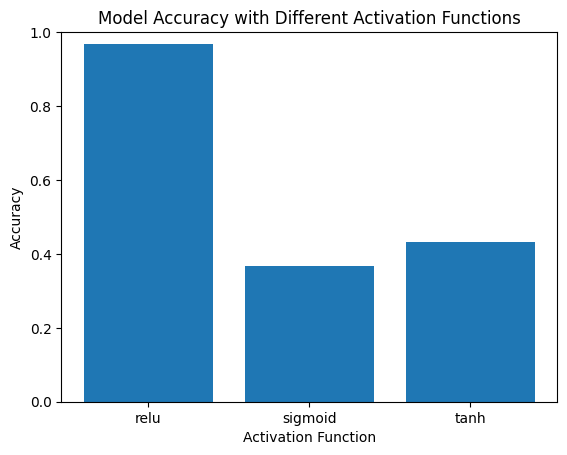

In [14]:
# Plotting the results
plt.bar(results.keys(), results.values())
plt.title('Model Accuracy with Different Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [17]:
#or ismein 3 activation function use kiye hoye hain aik sath
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization (scaling features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Binarize the labels (one-hot encoding)
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_test_binarized = lb.transform(y_test)

# Function to build and compile the model
def build_compile_model(activation_function):
    model = Sequential([
        Dense(10, input_shape=(X_train_scaled.shape[1],), activation=activation_function),  # First hidden layer
        Dense(20, activation='sigmoid'),  # Second hidden layer with Sigmoid
        Dense(10, activation='tanh'),     # Third hidden layer with Tanh
        Dense(3, activation='softmax')   # Output layer with Softmax for multi-class classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train and evaluate the model with the specific architecture
activation_function = 'relu'  # You can change this to 'sigmoid' or 'tanh' for other tests
model = build_compile_model(activation_function)

print(f"\nTraining with {activation_function} activation function:")
history = model.fit(
    X_train_scaled,
    y_train_binarized,
    epochs=50,
    batch_size=5,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_binarized, verbose=0)
print(f"Test Accuracy with {activation_function}: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with relu activation function:
Test Accuracy with relu: 1.0000
